# GIS Practicum Project
____________________________________
## Impact of Extreme Weather Events on Railway Incidents
### Determining high risk locations where monitoring stations could be installed

Data Sources:
    1. Weather Events
    2. Major Safety events
    3. Detailed Safety Events

Outline:
    1. Environment setup & data loading
    2. EDA
    3. Preprocessing
    4. Prep for scikit learn
    5. Model Building
    6. Model Evaluation

### 1. Environment Setup & Data Loading

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import os
import pandas as pd
import seaborn as sns

Get Current Working Directory:

In [2]:
wd = os.getcwd()
print(wd)

C:\Users\thoma\Desktop\Rutgers MBS\Externship Class\Practicum\Project


Load Data:

1. Major Safety Events:

In [3]:
safety_events_df = pd.read_csv(os.path.join(wd, 'Major_Safety_Events.csv'))

c:\users\thoma\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,32,33,36,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2. Weather Events:

In [4]:
weather_events_df = pd.read_csv(os.path.join(wd, 'WeatherEvents_Jan2016-Dec2020.csv'))

### 2. EDA

1. Major Safety Events

In [5]:
safety_events_df.head()

,5 Digit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Transit Employee Injuries,Other Worker Injuries,Pedestrian or Bicyclist Injuries,Pederstiran in Crosswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Occupant of Other Vehicle Injuries,Other Injuries,Suicide Injuries
0,50157.0,5157,Butler County Regional Transit Authority,Independent Public Agency or Authority of Tran...,CB,DO,30,"Cincinnati, OH-KY-IN",788.0,1624827.0,...,0,0,0,0,0,0,0,1,0,0
1,50157.0,5157,Butler County Regional Transit Authority,Independent Public Agency or Authority of Tran...,DR,DO,30,"Cincinnati, OH-KY-IN",788.0,1624827.0,...,0,0,0,0,0,0,0,0,0,0
2,40130.0,4130,Macon-Bibb County Transit Authority,Independent Public Agency or Authority of Tran...,MB,DO,234,"Macon, GA",98.0,137570.0,...,0,0,0,0,0,0,0,0,0,0
3,20137.0,2137,Monroe Bus Corporation,Private-For-Profit Corporation,CB,DO,89,"Poughkeepsie-Newburgh, NY-NJ",327.0,423566.0,...,0,0,0,0,0,0,0,26,0,0
4,90014.0,9014,Alameda-Contra Costa Transit District,Independent Public Agency or Authority of Tran...,MB,DO,13,"San Francisco-Oakland, CA",524.0,3281212.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
safety_events_df.shape

(62557, 84)

In [7]:
safety_events_df.columns

Index(['5 Digit NTD ID', '4 Digit NTD ID', 'Agency', 'Organization Type',
       'Mode', 'Type of Service', 'Primary UZA Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Year',
       'Incident Number', 'Incident Date', 'Incident Time', 'Event Type',
       'Other Event Type Description', 'Safety/Security', 'Collision With',
       'Property Damage', 'Total Injuries', 'Total Fatalities',
       'Life Safety (Y/N)', 'Number of Transit Vehicles Involved',
       'Towed (Y/N)', 'Number of Vehicles Involved', 'Location Type',
       'Incident Location', 'Evacuation Comment', 'Self Evacuation (Y/N)',
       'Evacuation Location', 'HazMat Type', 'HazMat Type Description',
       'Fire Type', 'Fire Fuel', 'Other Fire Fuel Description', 'Weather',
       'Lighting', 'Current Condition', 'Tide', 'Road Configuration',
       'Track Configuration', 'Path Condition', 'Rail Alignment',
       'Rail Grade 

In [8]:
set(safety_events_df['Right of Way Condition'])

{'Debris',
 'Dry',
 'Dry,Dry',
 'Dry,Dry,Dry',
 'Dry,Snow / slush',
 'Ice',
 'Other',
 'Snow / slush',
 'Snow / slush,Snow / slush',
 'Wet',
 'Wet,Wet',
 nan}

In [33]:
set(safety_events_df['Rail Alignment'])

{'Exclusive right-of_way: at grade',
 'Exclusive right-of_way: elevated track',
 'Exclusive right-of_way: sidings / rail yard / other non-revenue track',
 'Exclusive right-of_way: tunnel',
 'Non-exclusive right-of-way: Shared with vehicles or pedestrians',
 'Other',
 'Shared with other rail vehicles (controlled access to other non-rail vehicles)',
 nan}

In [40]:
safety_events_df.groupby(['Rail Alignment'])['Incident Number'].sum().to_frame()

,Incident Number
Rail Alignment,
Exclusive right-of_way: at grade,1913152237
Exclusive right-of_way: elevated track,1011469386
Exclusive right-of_way: sidings / rail yard / other non-revenue track,1413815544
Exclusive right-of_way: tunnel,3131820546
Non-exclusive right-of-way: Shared with vehicles or pedestrians,11366543096
Other,14185943
Shared with other rail vehicles (controlled access to other non-rail vehicles),955093880


In [38]:
atgrade_safety_events_df = safety_events_df[safety_events_df['Rail Alignment'] == 'Exclusive right-of_way: at grade']

In [39]:
atgrade_safety_events_df.shape

(755, 84)

In [41]:
atgrade_safety_events_df.head()

,5 Digit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Transit Employee Injuries,Other Worker Injuries,Pedestrian or Bicyclist Injuries,Pederstiran in Crosswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Occupant of Other Vehicle Injuries,Other Injuries,Suicide Injuries
620,60008.0,6008,Metropolitan Transit Authority of Harris Count...,Independent Public Agency or Authority of Tran...,LR,DO,7,"Houston, TX",1660.0,4944332.0,...,0,0,0,0,0,0,0,2,0,0
621,60008.0,6008,Metropolitan Transit Authority of Harris Count...,Independent Public Agency or Authority of Tran...,LR,DO,7,"Houston, TX",1660.0,4944332.0,...,0,0,0,0,0,0,0,0,0,0
760,80001.0,8001,Utah Transit Authority,Independent Public Agency or Authority of Tran...,LR,DO,42,"Salt Lake City-West Valley City, UT",278.0,1021243.0,...,0,0,0,0,0,0,0,0,0,0
1129,90003.0,9003,San Francisco Bay Area Rapid Transit District,Independent Public Agency or Authority of Tran...,HR,DO,13,"San Francisco-Oakland, CA",524.0,3281212.0,...,0,0,0,0,0,0,0,0,0,0
1198,50015.0,5015,The Greater Cleveland Regional Transit Authority,Independent Public Agency or Authority of Tran...,LR,DO,25,"Cleveland, OH",772.0,1780673.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
atgrade_safety_events_df.groupby(['Year','Weather'])['Incident Number'].sum().to_frame()

Incident Number
Year Weather                            
2014 Clear                      19810621
     Cloudy                           62
     Raining                         328
2015 Clear                      41588350
     Cloudy                      8454948
     Foggy / misting             2142026
     Raining                     9888169
     Snowing / sleeting          2071221
2016 Clear                     203454975
     Cloudy                     32417691
     Foggy / misting             2321610
     Raining                    14748098
     Snowing / sleeting          2362213
2017 Clear                     195270903
     Cloudy                     43264477
     Foggy / misting             2464404
     Raining                    39452158
     Snowing / sleeting          7367795
2018 Clear                     285865410
     Cloudy                     41949688
     Foggy / misting             5463749
     Raining                    38368245
     Snowing / sleeting          8484365
2019 Clear                     260840881
     Cloudy                     48025984
     Foggy / misting             2914379
     Raining                    27080357
     Snowing / sleeting          5803779
2020 Clear                     311835632
     Cloudy                     93688548
     Raining                    29166127
2021 Clear                     106117311
     Cloudy                     13627783
     Raining                     3439155
     Snowing / sleeting          3400795

In [31]:
set(safety_events_df['Derailment Type'])

{'Mainline Derailment', 'Yard', nan}

In [32]:
safety_events_df.groupby(['Derailment Type'])['Incident Number'].sum().to_frame()

,Incident Number
Derailment Type,
Mainline Derailment,1146378969
Yard,1008366945


In [30]:
safety_events_df.groupby(['Right of Way Condition'])['Incident Number'].sum().to_frame()

,Incident Number
Right of Way Condition,
Debris,15882590
Dry,92141454673
"Dry,Dry",160719715
"Dry,Dry,Dry",2439744
"Dry,Snow / slush",39
Ice,1023931467
Other,19798859
Snow / slush,2050523382
"Snow / slush,Snow / slush",2689445


In [37]:
safety_events_df.groupby(['Year','Weather'])['Incident Number'].sum().to_frame().reset_index().sort_values(by=['Incident Number','Year'], ascending=False)

,Year,Weather,Incident Number
33,2019,Clear,16982927711
27,2018,Clear,15881521600
21,2017,Clear,14405834882
41,2020,Clear,13589448240
15,2016,Clear,12836989867
48,2021,Clear,6150847408
8,2015,Clear,2796413397
34,2019,Cloudy,2212058747
22,2017,Cloudy,2178487462
16,2016,Cloudy,1993371462


In [9]:
safety_event_cols = safety_events_df.columns.tolist()

In [10]:
safety_event_tots_cols = [col for col in safety_event_cols if ('Total' in col) or ('Incident' in col) or ('ID' in col)]

In [11]:
safety_events_df.loc[:,safety_event_tots_cols]

,5 Digit NTD ID,4 Digit NTD ID,Incident Number,Incident Date,Incident Time,Total Injuries,Total Fatalities,Incident Location
0,50157.0,5157,1,2/5/2014 0:00,11:15:45,2,0,NaN
1,50157.0,5157,2,1/17/2014 0:00,9:40:56,1,0,NaN
2,40130.0,4130,1,1/21/2014 0:00,6:52:34,0,1,NaN
3,20137.0,2137,2,1/6/2014 0:00,7:20:47,28,0,NaN
4,90014.0,9014,1,1/17/2014 0:00,16:08:52,1,0,NaN
5,90014.0,9014,2,1/23/2014 0:00,13:46:46,2,0,NaN
6,90014.0,9014,3,1/29/2014 0:00,23:30:44,2,0,NaN
7,90014.0,9014,4,1/31/2014 0:00,16:08:37,1,0,NaN
8,90014.0,9014,5,1/22/2014 0:00,9:17:02,1,0,NaN
9,40005.0,4005,2,1/29/2014 0:00,10:58:17,1,0,NaN


In [12]:
safety_events_df.isnull().sum()

5 Digit NTD ID                                   17
4 Digit NTD ID                                  167
Agency                                           17
Organization Type                              1674
Mode                                            131
Type of Service                                 131
Primary UZA Code                                  0
Primary UZA Name                               1673
Primary UZA Sq Miles                           1656
Primary UZA Population                         1656
Service Area Sq Miles                           979
Service Area Population                         979
Year                                              0
Incident Number                                   0
Incident Date                                     0
Incident Time                                     0
Event Type                                        0
Other Event Type Description                  60200
Safety/Security                                   0
Collision Wi

2. Weather Events

In [13]:
weather_events_df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [14]:
weather_events_df.shape

(6274206, 13)

In [15]:
weather_events_df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'TimeZone', 'AirportCode', 'LocationLat', 'LocationLng', 'City',
       'County', 'State', 'ZipCode'],
      dtype='object')

In [16]:
weather_events_df.isnull().sum()

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
AirportCode           0
LocationLat           0
LocationLng           0
City              11683
County                0
State                 0
ZipCode           48637
dtype: int64

In [17]:
weather_events_df['StartTime(UTC)'] = pd.to_datetime(weather_events_df['StartTime(UTC)'])
weather_events_df['EndTime(UTC)'] = pd.to_datetime(weather_events_df['EndTime(UTC)'])

In [18]:
weather_events_df['StartYear'] = weather_events_df['StartTime(UTC)'].dt.year
weather_events_df['EndYear'] = weather_events_df['EndTime(UTC)'].dt.year
weather_events_df['StartMonth'] = weather_events_df['StartTime(UTC)'].dt.month
weather_events_df['EndMonth'] = weather_events_df['EndTime(UTC)'].dt.month
weather_events_df['StartDate'] = weather_events_df['StartTime(UTC)'].dt.date
weather_events_df['EndDate'] = weather_events_df['EndTime(UTC)'].dt.date
weather_events_df['StartHour'] = weather_events_df['StartTime(UTC)'].dt.hour
weather_events_df['EndHour'] = weather_events_df['EndTime(UTC)'].dt.hour

In [19]:
set(weather_events_df['Severity'])

{'Heavy', 'Light', 'Moderate', 'Other', 'Severe', 'UNK'}

In [20]:
weather_events_df.groupby(['Type','Severity'])['EventId'].nunique().to_frame()

EventId
Type          Severity         
Cold          Severe     169182
Fog           Moderate   427796
              Severe     957468
Hail          Other        2627
Precipitation UNK         96684
Rain          Heavy      139268
              Light     3112142
              Moderate   500931
Snow          Heavy       27055
              Light      708828
              Moderate    91672
Storm         Severe      40553

In [21]:
heavy_or_severe_weather_df = weather_events_df[weather_events_df['Severity'].isin(['Heavy','Severe'])]

In [22]:
heavy_or_severe_weather_df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,...,State,ZipCode,StartYear,EndYear,StartMonth,EndMonth,StartDate,EndDate,StartHour,EndHour
6,W-7,Fog,Severe,2016-01-09 12:54:00,2016-01-09 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016,2016,1,1,2016-01-09,2016-01-09,12,15
8,W-9,Fog,Severe,2016-01-09 16:14:00,2016-01-09 16:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016,2016,1,1,2016-01-09,2016-01-09,16,16
10,W-11,Cold,Severe,2016-01-09 16:54:00,2016-01-09 20:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016,2016,1,1,2016-01-09,2016-01-09,16,20
11,W-12,Fog,Severe,2016-01-10 02:54:00,2016-01-10 04:14:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016,2016,1,1,2016-01-10,2016-01-10,2,4
12,W-13,Fog,Severe,2016-01-10 09:34:00,2016-01-10 10:14:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016,2016,1,1,2016-01-10,2016-01-10,9,10


In [23]:
heavy_or_severe_weather_df.groupby(['StartYear'])['EventId'].nunique().to_frame()

,EventId
StartYear,
2016,235188
2017,236140
2018,240534
2019,310922
2020,310742


In [24]:
extreme_weather_agg_df = heavy_or_severe_weather_df.groupby(['StartYear','StartMonth'])['EventId'].nunique().to_frame()

In [25]:
ext_weath_plot_df = extreme_weather_agg_df.reset_index().rename(columns={'EventId':'Count'})

In [26]:
ext_weath_plot_df['Year_Month'] = ext_weath_plot_df['StartYear'].astype(str) + '_' + ext_weath_plot_df['StartMonth'].astype(str)

In [27]:
ext_weath_plot_df.insert(0, 'Index', range(0,len(ext_weath_plot_df)))

In [28]:
ext_weath_plot_df.head()

,Index,StartYear,StartMonth,Count,Year_Month
0,0,2016,1,29460,2016_1
1,1,2016,2,19825,2016_2
2,2,2016,3,17979,2016_3
3,3,2016,4,14073,2016_4
4,4,2016,5,15713,2016_5


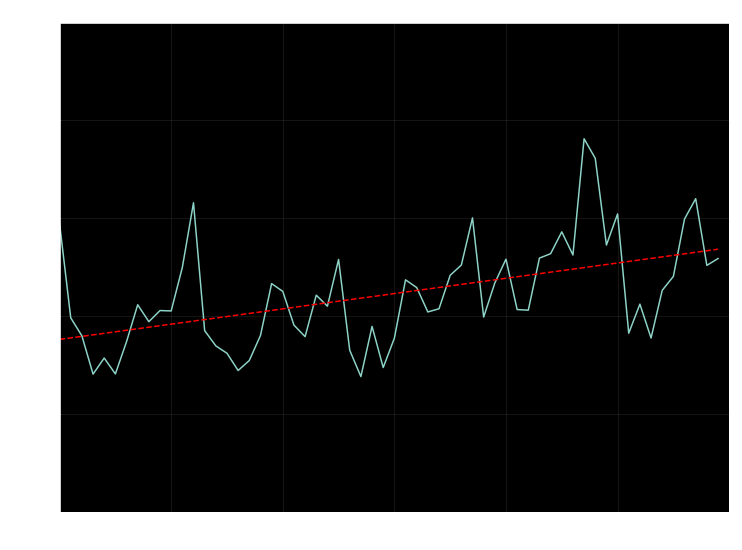

In [29]:
plt.figure(figsize=(12,9))
plt.style.use('dark_background')

x = ext_weath_plot_df['Index']
y = ext_weath_plot_df['Count']

plt.plot(x,y)
plt.title('Continental U.S. Extreme Weather Events Over Time')
plt.ylabel('Count of Events')
plt.xlabel('Months Since January 2016')
plt.axis([0,60,0,50000])
plt.grid(True, alpha=0.2, color='grey', linestyle="--")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()